In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams.update({'font.size': 14})

In [2]:
def gamblers_ruin():
    gambling_money = 50
    gambling_goal = 100
    gambling_simulations = []
    
    while gambling_money in range(1, gambling_goal):
        bet_size=1
        win_or_loss = random.randrange(-1,2, step =2)
        gambling_money += bet_size*win_or_loss
        gambling_simulations.append(gambling_money)
    return gambling_simulations

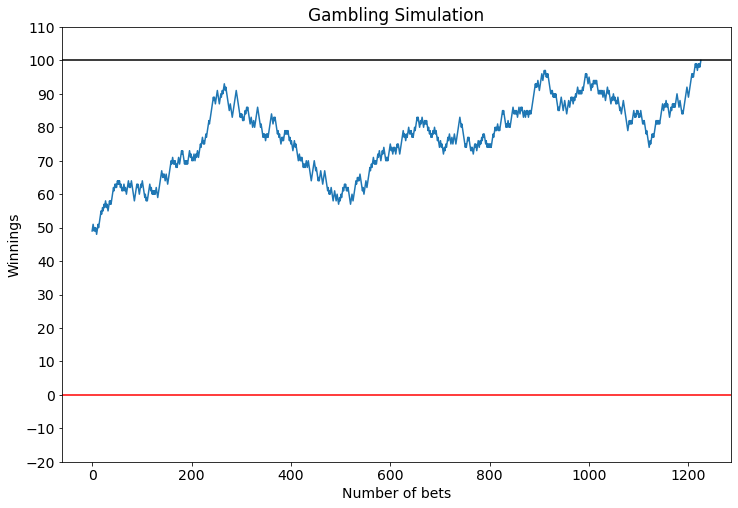

In [4]:
plt.plot(gamblers_ruin())
plt.yticks(np.arange(-20,120,10))
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=100, color='black', linestyle='-')
plt.xlabel('Number of bets')
plt.ylabel('Winnings')
plt.title('Gambling Simulation');

In [5]:
def prob_of_ruin(gambling_goal, initial_gambling_money):
    return(gambling_goal - initial_gambling_money)/gambling_goal

In [6]:
prob_of_ruin(100,50)

0.5

In [7]:
sim_list = []

while len(sim_list) < 100:
    sim_list.append(gamblers_ruin()[-1])
    
np.mean(sim_list)

53.0

In [8]:
mc_example = {'NYC':  [0.25,0,0.75,1],
              'Paris':[0.25,0.25,0,0],
              'Cairo':[0.25, 0.25, 0.25,0],
              'Seoul':[0.25, 0.5,0,0]}

mc = pd.DataFrame(data=mc_example, index = ['NYC', 'Paris', 'Cairo', 'Seoul'])

In [9]:
travel_sim = []
travel_sim.append(mc.iloc[0].index[0])
city = np.random.choice(mc.iloc[0].index, p = mc.iloc[0])
travel_sim.append(city)

while len(travel_sim) < 25:
    city = np.random.choice(mc.iloc[mc.index.get_loc(city)].index, p=mc.iloc[mc.index.get_loc(city)])
    travel_sim.append(city)

In [10]:
travel_sim

['NYC',
 'Paris',
 'Seoul',
 'NYC',
 'Cairo',
 'Cairo',
 'Cairo',
 'NYC',
 'Seoul',
 'NYC',
 'Seoul',
 'NYC',
 'NYC',
 'NYC',
 'NYC',
 'Seoul',
 'NYC',
 'Cairo',
 'Cairo',
 'NYC',
 'Paris',
 'Seoul',
 'NYC',
 'Seoul',
 'NYC']

In [11]:
# n Step Transition Matrix
def matrix_power(matrix, power): 
    if power == 0:
        return np.identity(len(matrix))
    elif power == 1:
        return matrix
    else:
        return np.dot(matrix, matrix_power(matrix,power-1))

In [13]:
matrix_power(mc.to_numpy(), 3)

array([[0.453125, 0.15625 , 0.203125, 0.1875  ],
       [0.390625, 0.1875  , 0.21875 , 0.203125],
       [0.46875 , 0.140625, 0.203125, 0.1875  ],
       [0.5     , 0.125   , 0.1875  , 0.1875  ]])